In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv

## Load files

In [3]:
df = pandas.read_excel('../data/globalterrorismdb_0616dist.xlsx')

In [4]:
df_15_16 = pandas.read_excel('../data/Global Terrorism Database 2015-2016 Preliminary Data EMBARGOED.xlsx') 

In [5]:
# is the newest 2015 data same as last?
print df[df.iyear==2015].eventid.count()
print df_15_16[df_15_16.iyear==2015].eventid.count()

14806
14843


In [6]:
#let's use the latest 2015
df = pandas.concat([df[df.iyear < 2015], df_15_16])

Check basic stats

In [7]:
print df.eventid.count()
print df.iyear.unique()

170255
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982 1983
 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]


In [8]:
df.groupby('iyear').nkill.sum()[36:].sort_values(ascending=False)

iyear
2014    43550.0
2015    38471.0
2016    34623.0
2013    22226.0
2012    15432.0
2007    12836.0
2009     9271.0
2008     9093.0
2011     8198.0
2010     7720.0
Name: nkill, dtype: float64

## Rise of trucks? Note: A car bomb is type1_txt is bombing/explosion and subtype is vehicle

In [9]:
set(df.attacktype1_txt)

{u'Armed Assault',
 u'Assassination',
 u'Bombing/Explosion',
 u'Facility/Infrastructure Attack',
 u'Hijacking',
 u'Hostage Taking (Barricade Incident)',
 u'Hostage Taking (Kidnapping)',
 u'Unarmed Assault',
 u'Unknown'}

In [11]:
set(df.weaptype1_txt)

{u'Biological',
 u'Chemical',
 u'Explosives/Bombs/Dynamite',
 u'Fake Weapons',
 u'Firearms',
 u'Incendiary',
 u'Melee',
 u'Other',
 u'Radiological',
 u'Sabotage Equipment',
 u'Unknown',
 u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'}

In [12]:
df[df.iyear == 2016].weaptype1_txt.value_counts()

Explosives/Bombs/Dynamite                                                      7559
Firearms                                                                       3436
Unknown                                                                        1449
Incendiary                                                                      614
Melee                                                                           329
Chemical                                                                         28
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      13
Other                                                                            10
Sabotage Equipment                                                                8
Name: weaptype1_txt, dtype: int64

In [16]:
df[df.iyear == 2016].weapsubtype1_txt.value_counts()

Unknown Explosive Type                       2842
Unknown Gun Type                             2803
Projectile (rockets, mortars, RPGs, etc.)    1159
Vehicle                                       923
Other Explosive Type                          701
Land Mine                                     505
Suicide (carried bodily by human being)       465
Arson/Fire                                    454
Grenade                                       386
Automatic Weapon                              275
Remote Trigger                                260
Knife or other Sharp Object                   245
Handgun                                       219
Sticky Bomb                                   152
Molotov Cocktail/Petrol Bomb                  137
Rifle/Shotgun (non-automatic)                 135
Letter Bomb                                    72
Dynamite/TNT                                   43
Time Fuse                                      31
Unknown Weapon Type                            26


 ### Trends over time

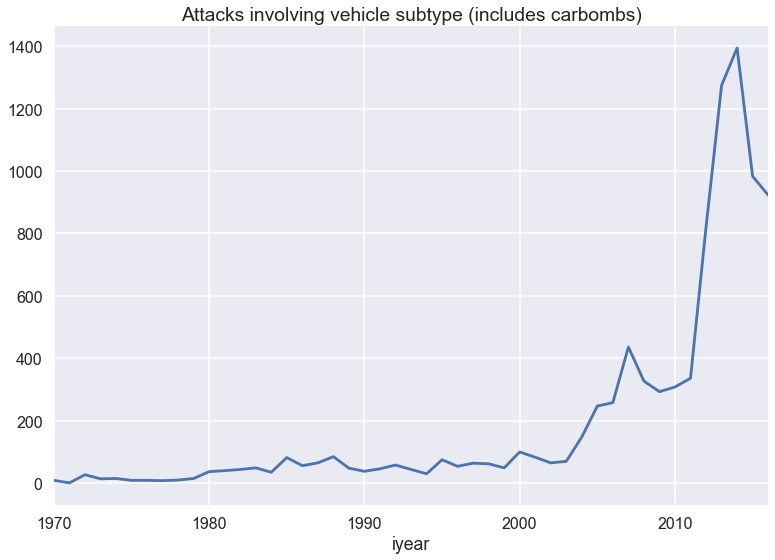

In [56]:
df[df.weapsubtype1_txt == 'Vehicle'].groupby('iyear').eventid.count().plot()
plt.title("Attacks involving vehicle subtype (includes carbombs)")

(0, 20)

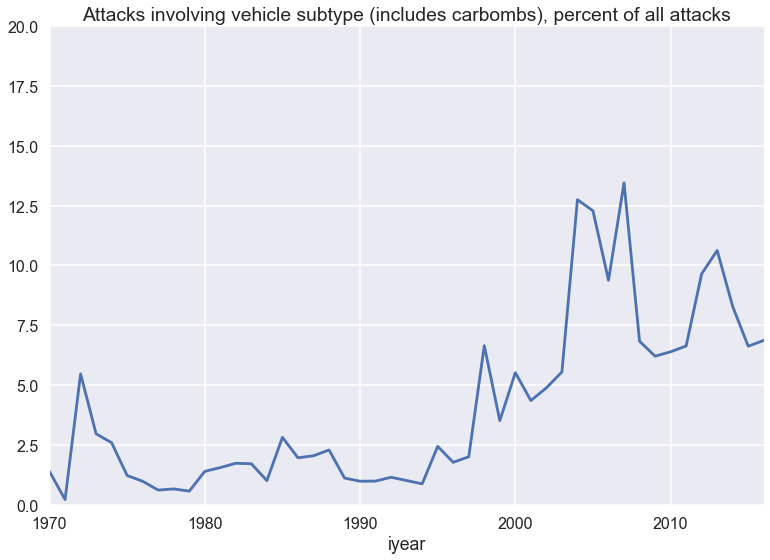

In [57]:
vehicle_sub = df[df.weapsubtype1_txt == 'Vehicle'].groupby('iyear').eventid.count()
vehicle_sub
total = df.groupby('iyear').eventid.count()
(100*vehicle_sub/total).plot()

plt.title("Attacks involving vehicle subtype (includes carbombs), percent of all attacks")
plt.ylim([0,20])

(0, 20)

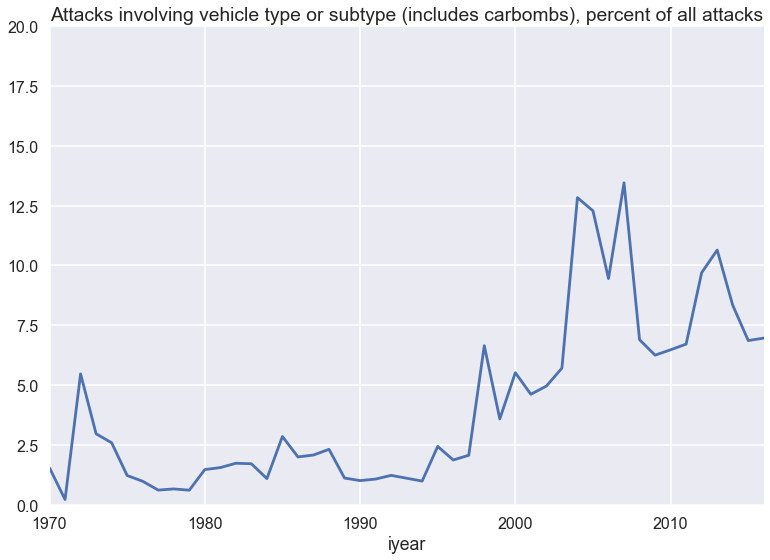

In [59]:
vehicle_sub = df[(df.weapsubtype1_txt == 'Vehicle') | (df.weaptype1_txt=='Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)')].groupby('iyear').eventid.count()
vehicle_sub
total = df.groupby('iyear').eventid.count()
(100*vehicle_sub/total).plot()

plt.title("Attacks involving vehicle type or subtype (includes carbombs), percent of all attacks")
plt.ylim([0,20])

(0, 20)

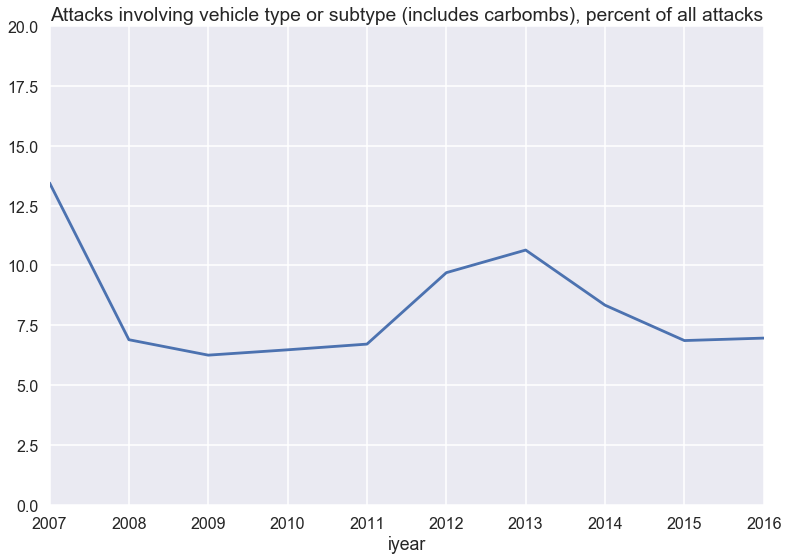

In [62]:
vehicle_sub = df[(df.iyear > 2006) & ((df.weapsubtype1_txt == 'Vehicle') | (df.weaptype1_txt=='Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'))].groupby('iyear').eventid.count()
vehicle_sub
total = df[df.iyear > 2006].groupby('iyear').eventid.count()
(100*vehicle_sub/total).plot()

plt.title("Attacks involving vehicle type or subtype (includes carbombs), percent of all attacks")
plt.ylim([0,20])

## all types over time

In [86]:
subcat = df.groupby(['iyear','weapsubtype1_txt']).size().reset_index(name='count')

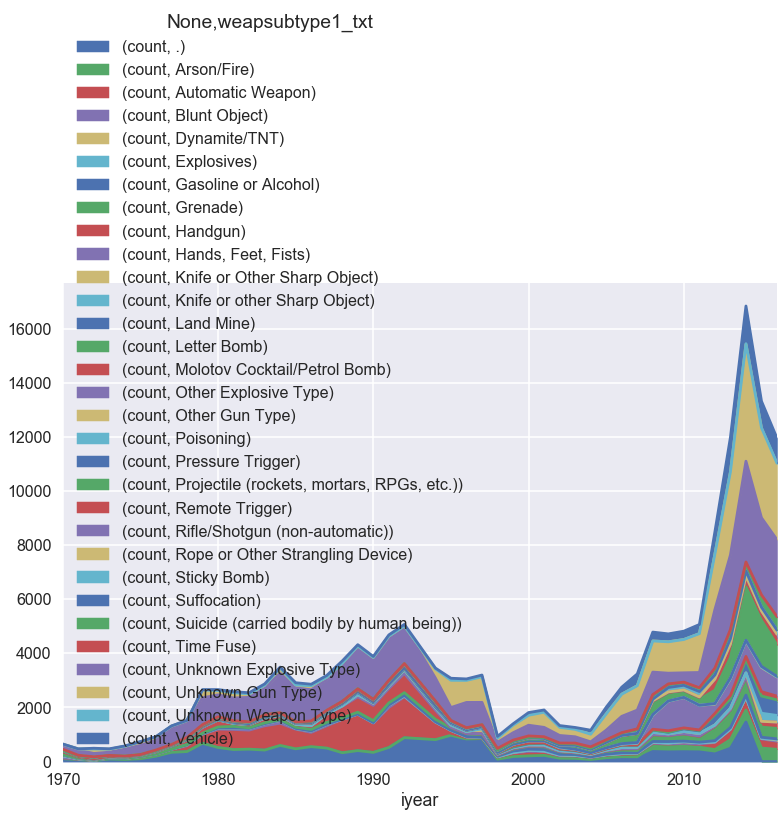

In [87]:
subcat.pivot(index='iyear', columns='weapsubtype1_txt').plot(kind='area')

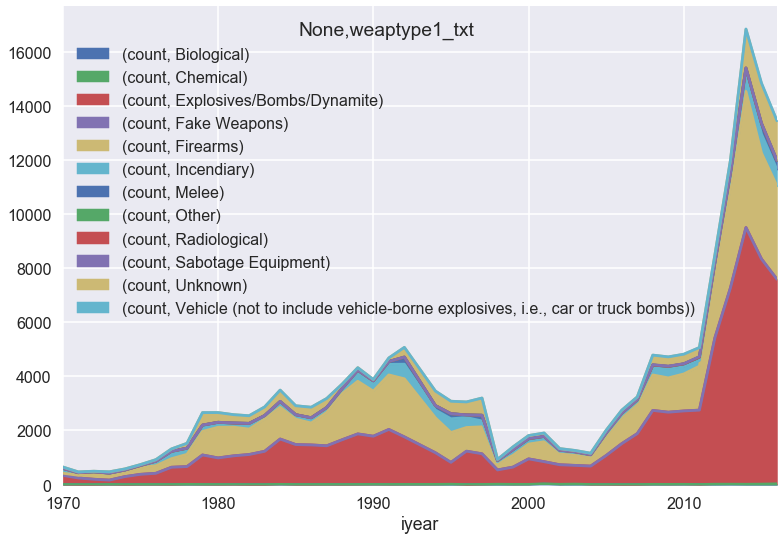

In [88]:
cat = df.groupby(['iyear','weaptype1_txt']).size().reset_index(name='count')
cat.pivot(index='iyear', columns='weaptype1_txt').plot(kind='area')

## iran attacks check

In [95]:
df[(df.iyear > 2006) & (df.country_txt=='Iran')].size 

14248

In [100]:
df[(df.iyear > 2006) & (df.country_txt=='Iran') & (df.city=='Tehran')][['iyear','imonth','iday','city','weaptype1_txt','nwound','nkill']].to_csv('../data/tehran-2007-2016.csv')

In [101]:
df[(df.iyear > 2006) & (df.country_txt=='Iran')][['iyear','imonth','iday','city','weaptype1_txt','nwound','nkill']].to_csv('../data/iran-2007-2016.csv')